In [2]:
import quandl
import math,datetime
import pandas as pd
import numpy as np
from sklearn import preprocessing,cross_validation,svm
import matplotlib.pyplot as plt #To plot stuff
from matplotlib import style #To make it look decent
import pickle
style.use('ggplot')# Specify which decent looking thing you want
#Scaling for features b/w -1 & 1
#to creaate our training and testing samples,split your data
from sklearn.linear_model import LinearRegression
df=quandl.get('WIKI/GOOGL')
print(df.head())
#pickling: serialisation of any python object eg dictionary or in our case a classifier
#pickle is kind of like a file : you open it , u read it and close it

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [3]:
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]


print(df.head())


            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume
Date                                                                
2004-08-19  50.159839  52.191109  48.128568   50.322842   44659000.0
2004-08-20  50.661387  54.708881  50.405597   54.322689   22834300.0
2004-08-23  55.551482  56.915693  54.693835   54.869377   18256100.0
2004-08-24  55.792225  55.972783  51.945350   52.597363   15247300.0
2004-08-25  52.542193  54.167209  52.100830   53.164113    9188600.0


In [4]:

df['HL_PCT']=(df['Adj. High']-df['Adj. Low'])/df['Adj. Low']


df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']
print(df.head())

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  \
Date                                                                   
2004-08-19  50.159839  52.191109  48.128568   50.322842   44659000.0   
2004-08-20  50.661387  54.708881  50.405597   54.322689   22834300.0   
2004-08-23  55.551482  56.915693  54.693835   54.869377   18256100.0   
2004-08-24  55.792225  55.972783  51.945350   52.597363   15247300.0   
2004-08-25  52.542193  54.167209  52.100830   53.164113    9188600.0   

              HL_PCT  PCT_change  
Date                              
2004-08-19  0.084410    0.003250  
2004-08-20  0.085373    0.072270  
2004-08-23  0.040624   -0.012279  
2004-08-24  0.077532   -0.057264  
2004-08-25  0.039661    0.011837  


In [5]:
df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume',]]

forecast_col='Adj. Close'

df.fillna(-99999,inplace=True)

forecast_out=int(math.ceil(0.01*len(df)))

df['label']=df[forecast_col].shift(-forecast_out)#Shifted up so that labels are of the future i.e. predictions

print(df.head())



            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  0.084410    0.003250   44659000.0  69.078238
2004-08-20   54.322689  0.085373    0.072270   22834300.0  67.839414
2004-08-23   54.869377  0.040624   -0.012279   18256100.0  68.912727
2004-08-24   52.597363  0.077532   -0.057264   15247300.0  70.668146
2004-08-25   53.164113  0.039661    0.011837    9188600.0  71.219849


In [6]:
X=np.array(df.drop(['label'],1))#everything except label
X=preprocessing.scale(X)#Sometimes scale with entire data set 
X_lately=X[-forecast_out:]
X=X[:-forecast_out]
#only needed for training set , values for which we have label obtained by shifting before
df.dropna(inplace=True)#Return object with labels on given axis omitted where alternately any or all of the data are missing
df.dropna(inplace=True)
y=np.array(df['label'])
print(len(X),len(y))

3389 3389


C:\Users\Dell\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [13]:
X_train, X_test, y_train , y_test=cross_validation.train_test_split(X,y,test_size=0.2)
##clf=LinearRegression(n_jobs=-1)
#n_jobs for multithreading , -1 for creating max threads , computations faster
#clf=svm.SVR(kernel='poly')
##clf.fit(X_train, y_train)
#should save classiffier just after you train it
##with open('LinearRegression.pickle','wb') as f: #Open file with intention to write, use temporary variable as f
##    pickle.dump(clf,f)
#Now,to reuse the classifier
pickle_in=open('LinearRegression.pickle','rb')
clf=pickle.load(pickle_in)
#we have renamed/redefined classiffier
#pickle is saved in directory we are working in , we just read pickle and load classifier
accuracy=clf.score(X_test, y_test)
print(accuracy)

0.976292608153


In [12]:
forecast_set=clf.predict(X_lately)#using scikitlearn to predict , can pass single or array of values
print(forecast_set,accuracy,forecast_out)

[ 1103.95512457  1070.4511058   1015.49995935  1059.64334512  1072.70274566
  1073.6294561   1092.49991748  1110.43432101  1114.92948812  1123.14306811
  1132.62802347  1128.46437847  1148.32916589  1164.64913128  1134.1148296
  1121.09744645  1084.96607361  1103.64911585  1114.53944116  1120.78377267
  1135.65152612  1150.26702241  1181.62261858  1185.76492688  1155.15374704
  1168.86458842  1169.84121839  1151.62113016  1116.57290951  1114.12529953
  1112.97745975  1067.92536659  1040.77884221  1070.08581005  1015.94880843] 0.97443737726 35


In [9]:
df['Forecast']=np.nan#Specify entire column is not a no. data
last_date=df.iloc[-1].name#the last date
last_unix=last_date.timestamp()#time at last date
one_day=86400
next_unix=last_unix+one_day#Next day to predict(1st one)


for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)#timestamp of next day
    next_unix+=one_day#increment to next day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)] + [i]
    #on that date i.e. all columns-1 , sets them to NaN. Basically making the future features NaN
    #final column is [i], which is forecast
    #.loc refers to the index of the data frame. next_date is a date stamp i.e. it is index of dataframe
print(df.tail())
#Iterating through the forecast set taking each forecast and day and setting these as the values in the data frame
#FORECAST FOR FUTURE DATES

            Adj. Close  HL_PCT  PCT_change  Adj. Volume  label     Forecast
2018-03-08         NaN     NaN         NaN          NaN    NaN  1116.155196
2018-03-09         NaN     NaN         NaN          NaN    NaN  1072.181870
2018-03-10         NaN     NaN         NaN          NaN    NaN  1044.729372
2018-03-11         NaN     NaN         NaN          NaN    NaN  1072.661257
2018-03-12         NaN     NaN         NaN          NaN    NaN  1021.048999


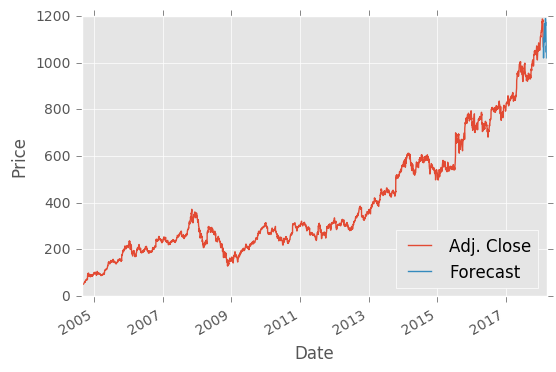

In [10]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)#4th location , bottom right
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
#graph of data , blue is predicted data
#for loop used to have date on the x axis